<h1 style="direction:rtl;text-align:justify;font-family:'B Yekan'">
شروع یک مثال:پرسپترون تک لایه
</h1>

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
تا الان چیزهایی در مورد نامپی یاد گرفتیم، حالا می‌خواهیم در یک مثال چیزهای جدیدتری یاد بگیریم.
آنچه در این جلسه یاد می‌گیریم:
<ul style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
<li>
پیاده سازی یک شبکه پرسپترون تک لایه در پایتون
</li>
<li>
نمایش داده‌ها در پایتون
</li>
<li>
عملیات ماتریسی در نامپی
</li>
<li>
مقدمه‌ای بر ماژول sklearn
</li>
</ul>
</p>

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
خب بگذارید اول ببنیم یک شبکه عصبی پرسپترون تک لایه چطور مدل می‌شود (البته در مورد این شبکه به طور کامل در درس دیده‌اید، اینجا فقط یادآوری می‌کنیم.) :
</p>

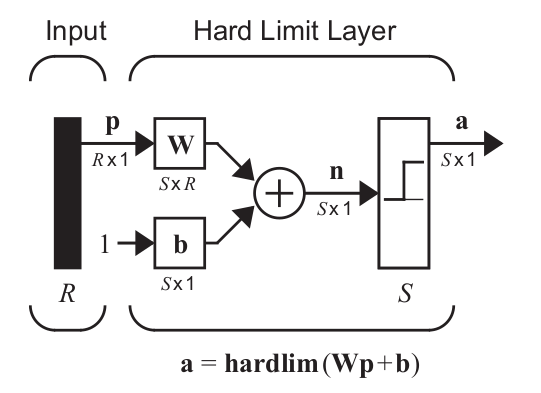

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
حالا بیایید از توابع تحریک شروع کنیم. ولی پیش از آن  نیاز داریم که چند کتابخانه را به برنامه اضافه کنیم. یکی از آن‌ها محاسبات ماتریسی هست و دیگری کتابخانه‌ای برای نمایش داده‌ها:
</p>

In [632]:
import numpy as np
from matplotlib import pyplot as plt, cm

In [633]:
def hardlim(x):
    return 1.0 * (x >= 0)

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
حالا تابع تحریکی را که تعریف کردید را رسم کنید، مثلا روی اعداد بازه منفی یک تا یک:
</p>

In [634]:
x = np.array([[1], [-1]])
hardlim(x)

array([[1.],
       [0.]])

In [635]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [636]:
def relu(x):
    z = x.copy()
    z[x<0] = 0
    return z

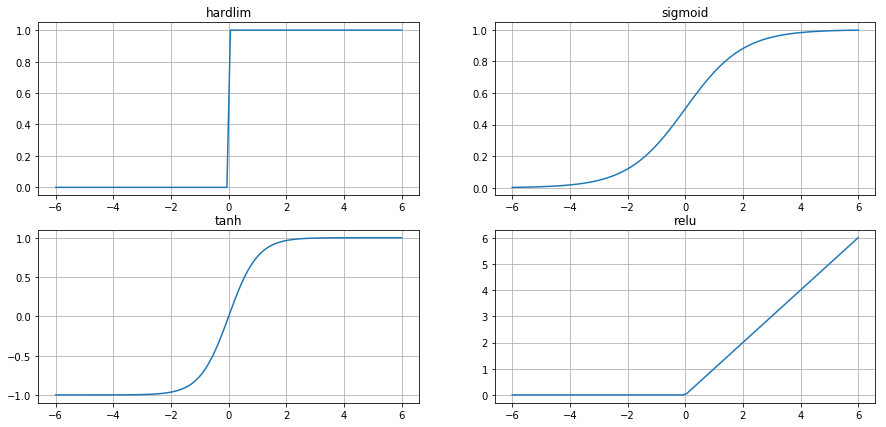

In [637]:
x = np.linspace(-6, 6, 100)
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
plt.plot(x, hardlim(x));plt.title('hardlim');plt.grid()
plt.subplot(2,2,2)
plt.plot(x, sigmoid(x));plt.title('sigmoid');plt.grid()
plt.subplot(2,2,3)
plt.plot(x, np.tanh(x));plt.title('tanh');plt.grid()
plt.subplot(2,2,4)
plt.plot(x, relu(x));plt.title('relu');plt.grid()

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
توابع تحریک ما به راحتی روی بردار و عدد کار می‌کنند و شکل‌های آن‌ها درست بدست آمده است. الان باید به دنبال یک مدل ماتریسی برای شبکه پرسپترون باشیم.
</p>

In [638]:
R = 2  # input size
S = 2  # output size
W = np.zeros((S, R))
b = np.zeros((S, 1))

In [639]:
N = 1  # number of instance.
P = np.random.randn(R, N)

In [640]:
# n = WP + b
n = W.dot(P) + b
n

array([[0.],
       [0.]])

In [641]:
# a = hardlim(n)
a = hardlim(n)
a

array([[1.],
       [1.]])

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
خب اگر تمام روابط بالا درست باشند، می‌توانیم وزن‌های شبکه را با استفاده از قاعده پرسپترون آموزش دهیم. قاعده پرسپترون به صورت زیر است:
</p>

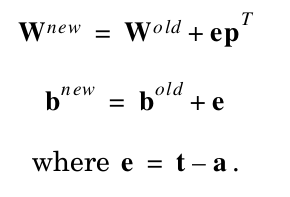

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
اما برای بروزرسانی وزن‌ها باید یک پایگاه داده مناسب داشته باشیم. بگذارید یک پایگاه ساده تصادفی از ۴ دسته داده استفاده کنیم.
به این صورت عمل کنید که هر دسته یک توزیع تصادفی نرمال دو بعدی حول میانگین خاصی قرار گرفته است. این میانگین برای دسته اول 
(۵-و۵-) 
و برای دسته دوم 
(۵و۵-)، 
برای دسته سوم 
(-۵و ۵) 
و در نهایت برای دسته چهارم حول 
(۵و۵)
قرار دارد. 
برای تولید اعداد تصادفی با توزیع نرمال از دستور زیر استفاده کنید:
</p>

>```python
numpy.random.randn(2, N) + numpy.array([[m1],[m2]])
```

In [642]:
N = 100
R = 2
x = np.zeros((R, N))
y = np.zeros((1, N))
# ----------------- #
x[:, 0:25] = np.random.randn(R, 25) +  np.array([[-3], [-3]]) #class #1
y[:, 0:25] = 0

x[:, 25:50] = np.random.randn(R, 25) +  np.array([[-3], [3]]) #class #2
y[:, 25:50] = 1

x[:, 50:75] = np.random.randn(R, 25) +  np.array([[3], [-3]]) #class #3
y[:, 50:75] = 2

x[:, 75:100] = np.random.randn(R, 25) +  np.array([[3], [3]]) #class #4
y[:, 75:100] = 3

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
بهتر از پیش از هر کاری، داده‌ها را در بازه منفی یک و یک نرمالیزه کرد. بنابراین ما مجموعه 
x 
را به بزرگترین عدد درون خود تقسیم می‌کنیم.
</p>

In [643]:
x = x / x.max()

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
مجموعه داده‌های ما ۱۰۰ عضو دارد، که می‌خواهیم ۷۰ عضو آن را به «تصادف» و به عنوان داده‌های آموزشی داشته باشیم. و ۳۰ عضو را به عنوان داده‌های آزمون انتخاب نماییم.
اما چطور این کار را انجام دهیم؟
یک راه این است که یک «جایگشت تصادفی» از ۱۰۰ اندیس  تولید کنیم و ۷۰ تای اول آن را به عنوان اندیس داده‌های آموزشی برداریم.
</p>

In [644]:
idx = np.random.permutation(N)
tr_idx = idx[0:70]
te_idx = idx[70::]
P = x[:,tr_idx]

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
برای آموزش شبکه نیاز داریم که مقادیر خروجی مناسب باشد، با توجه به این که ۴ دسته خروجی داریم، از کدگذاری دو دویی استفاده می‌کنیم و هر برچسب را در مبنای ۲ محاسبه می‌کنیم. 
</p>

In [645]:
T = np.zeros((S, tr_idx.shape[0]))
idx = np.where(y[0,tr_idx] == 0)[0]
T[0, idx] = 0
T[1, idx] = 0

idx = np.where(y[0,tr_idx] == 1)[0]
T[0, idx] = 0
T[1, idx] = 1

idx = np.where(y[0,tr_idx] == 2)[0]
T[0, idx] = 1
T[1, idx] = 0

idx = np.where(y[0,tr_idx] == 3)[0]
T[0, idx] = 1
T[1, idx] = 1

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
بگذارید داده‌های آموزش را در یک صفحه دو بعدی با استفاده از برچسب‌هایشان رسم کنیم:
</p>
<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
برای اینکار از کتابخانه 
matplotlib.pyplot 
دستور 
scatter 
استفاده می‌کنیم. داده‌ها به صورت مختصات دو بعدی هستند و برای هر دسته یک رنگ در نظر می‌گیریم. جهت اطلاع بیشتر در مورد نحوه نمایش، راهنمای 
scatter 
را ببینید.
</p>

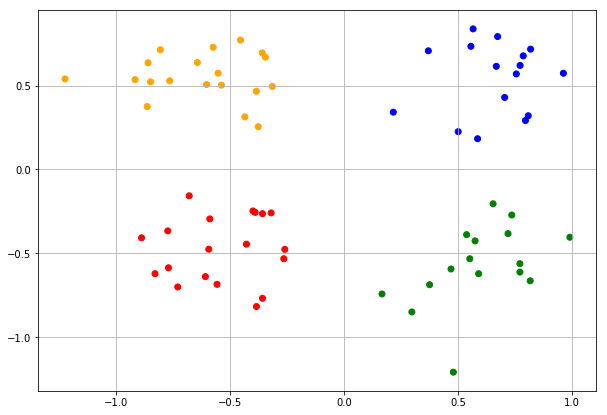

In [646]:
color = np.array(['red']*25+['orange']*25+['green']*25+['blue']*25)
color = color[tr_idx]
plt.figure(figsize=(10, 7))
plt.scatter(P[0,:], P[1,:], c=color);plt.grid()

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
وقت آن است برای نمونه‌ها یک بار تخمین بزنیم ببینم وزن‌های اولیه شبکه چگونه کار می‌کنند. یکبار دیگر به رابطه خروجی پرستپترون نگاه کنید و کد زیر را بنویسید:
</p>

In [647]:
a = hardlim(W.dot(P) + b)

In [648]:
a.shape, T.shape

((2, 70), (2, 70))

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
حالا برای نمونه‌ی اول خطا را محاسبه می‌کنیم. حواستان به ابعاد بردارهایی که از داخل ماتریس بیرون میاورید باشد:
</p>

In [649]:
i = 0
p = P[:, i].reshape(-1,1)

a = hardlim(W.dot(p) + b)

t = T[:, i].reshape(-1,1)
e = t - a
e

array([[ 0.],
       [-1.]])

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
قاعده پرسپترون را برای این نمونه می‌نویسیم:
</p>

In [650]:
W = W + e.dot(p.T)
b = b + e

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
خب این کار را برای همه داده‌های داخل مجموعه آموزشی انجام می‌دهیم:
</p>

In [651]:
# one Epoch of training:
for i in range(70):
    p = P[:, i].reshape(-1,1)

    a = hardlim(W.dot(p) + b)

    t = T[:, i].reshape(-1,1)
    e = t - a
    
    W = W + e.dot(p.T)
    b = b + e

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
به عنوان یک معیار برای توقف خطای جمعی را بررسی می‌کنیم. خطای جمعی را پیشتر حساب کردیم ولی این خطا باید دارای تمام اعداد صفر باشد. از آنجایی که برای هر نمونه از داده‌ها ۲ بعد داریم، بنابراین کل خطا را به صورت یک بردار در می‌آوریم. سپس صفرها را می‌شماریم:
</p>

In [652]:
E = T - hardlim(W.dot(P) + b)
E.shape

(2, 70)

In [653]:
E = E.ravel()
E.shape

(140,)

In [654]:
# number of None Zero elements in Error:
len(np.nonzero(E)[0])

8

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
برای این که همه آنچه را دیدیم در کنار هم بگذاریم، باید یک بیشینه برای 
Epochها 
مشخص کنیم و سپس شرط توقف را صفر شدن خطا در نظر بگیرم. در مجموع کد زیر را خواهیم داریم:
</p>

In [655]:
MaxIter = 10
for iters in range(MaxIter):
    # one Epoch of training:
    for i in range(70):
        p = P[:, i].reshape(-1,1)

        a = hardlim(W.dot(p) + b)

        t = T[:, i].reshape(-1,1)
        e = t - a

        W = W + e.dot(p.T)
        b = b + e
    # check overall Error:
    E = (T - hardlim(W.dot(P) + b)).ravel()
    if len(np.nonzero(E)[0]) == 0:
        print('trainiing finished due to get minimum error')
        break
else:
    print('trainig finished due to maximun number of iteration was reached')
        

trainiing finished due to get minimum error


In [656]:
def bin2dec(x):
    m, n = x.shape
    y = np.zeros((m,1))
    for i in range(m):
        t = x[i,:]
        y[i] = sum([k*(2**(n-1-j)) for j,k in enumerate(t)])
    return y

In [657]:
a = hardlim(W.dot(P) + b)
t = bin2dec(a.T)
t.T,y[:,tr_idx]

(array([[2., 3., 0., 0., 0., 1., 2., 2., 2., 1., 0., 3., 1., 3., 1., 3.,
         3., 1., 1., 3., 0., 2., 2., 0., 1., 0., 1., 1., 2., 3., 1., 1.,
         2., 2., 1., 2., 3., 1., 3., 2., 3., 0., 3., 0., 0., 2., 0., 0.,
         0., 3., 1., 3., 1., 2., 3., 0., 3., 3., 1., 2., 0., 0., 2., 0.,
         1., 1., 1., 0., 2., 0.]]),
 array([[2., 3., 0., 0., 0., 1., 2., 2., 2., 1., 0., 3., 1., 3., 1., 3.,
         3., 1., 1., 3., 0., 2., 2., 0., 1., 0., 1., 1., 2., 3., 1., 1.,
         2., 2., 1., 2., 3., 1., 3., 2., 3., 0., 3., 0., 0., 2., 0., 0.,
         0., 3., 1., 3., 1., 2., 3., 0., 3., 3., 1., 2., 0., 0., 2., 0.,
         1., 1., 1., 0., 2., 0.]]))

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
خب الان که شبکه آموزش داده شده است، بیایید روی داده‌های آزمون بررسی کنیم چه میزان خطا داریم:
</p>

In [658]:
P = x[:, te_idx]

T = np.zeros((S, te_idx.shape[0]))
idx = np.where(y[0,te_idx] == 0)[0]
T[0, idx] = 0
T[1, idx] = 0

idx = np.where(y[0,te_idx] == 1)[0]
T[0, idx] = 0
T[1, idx] = 1

idx = np.where(y[0,te_idx] == 2)[0]
T[0, idx] = 1
T[1, idx] = 0

idx = np.where(y[0,te_idx] == 3)[0]
T[0, idx] = 1
T[1, idx] = 1

In [659]:
a = hardlim(W.dot(P) + b)
E = (T - a).ravel()
len(np.nonzero(E)[0])

0

In [660]:
t = bin2dec(a.T)
c = ['red', 'orange', 'green', 'blue']
color = [c[int(i)] for i in t]

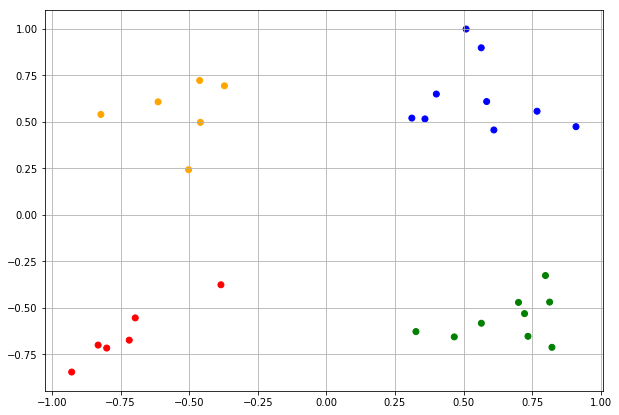

In [661]:
plt.figure(figsize=(10, 7))
plt.scatter(P[0,:], P[1,:], c=color);plt.grid()

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
مرز تصمیم‌گیری در این شبکه با ۲ نرون برابر ۲ خط است که این دو خط با رابطه زیر بدست می‌آیند:
</p>

> $ line 1: u_2 = -\frac{w[0]}{w[1]} u_1 - \frac{b}{w[1]} $  
>  
> $ line 2: u_2 = -\frac{w'[0]}{w'[1]} u_1 - \frac{b'}{w'[1]}$  
>  
> $ W = \begin{bmatrix} w[0] & w[1] \\ w'[0] & w'[1] \end{bmatrix} $  

In [662]:
def plot_hyperplane(w, b, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (b) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

[-1, 1, -1, 1]

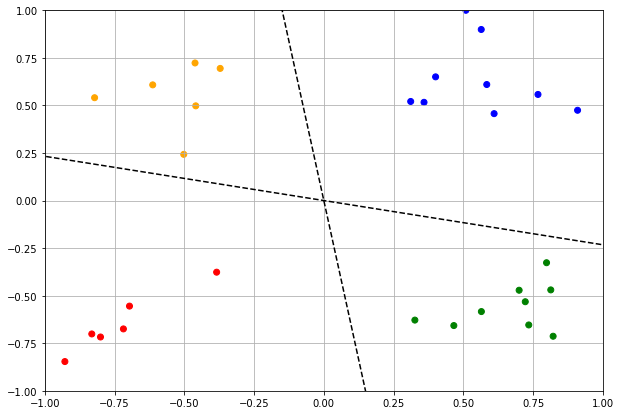

In [663]:
plt.figure(figsize=(10, 7))
plt.scatter(P[0,:], P[1,:], c=color);plt.grid()
plot_hyperplane(W[0], b[0], -1, 1, 'k--', 1)
plot_hyperplane(W[1], b[1], -1, 1, 'k--', 2)
plt.axis([-1,1,-1,1])

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
حالا بگذارید چندتا چیز را از اول بررسی کنیم. اول این که بجای این که خروجی شبکه را خودمان بررسی کنیم بگذارید از ماتریس در‌هم‌ریختگی استفاده کنیم.
</p>

[توضیحات بیشتر در مورد ماتریس درهم‌ریختگی](https://en.wikipedia.org/wiki/Confusion_matrix)

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
برای محاسبه ماتریس درهم‌ریختگی در پایتون می‌توان از کتابخانه 
sklearn 
استفاده کرد، اما 
sklearn 
خودش چی هست؟
</p>

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
کتابخانه 
sklearn یا scikit-learn 
یک مجموعه از ابزارهای مختلف و مورد نیاز در کاربرد یادگیری ماشین است که با استفاده از آن می‌توانیم به سادگی و قدرت ابزارها و روش‌های مختلف را امتحان و ارزیابی کنیم و یا در کاربردهای مختلف بکار ببریم.
</p>

In [664]:
from sklearn.metrics import confusion_matrix

In [665]:
confusion_matrix(y_pred=t, y_true=bin2dec(T.T))

array([[6, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 9, 0],
       [0, 0, 0, 9]])

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
گفتیم 
sklearn 
مجموعه‌ای از ابزارهای مورد نیاز در یادگیری ماشین است، بنابراین تمام کارهایی که الان انجام داده‌ایم را باید بتوانیم با این کتابخانه به سادگی انجام دهیم. بگذارید ببنیم در این کتابخانه چه توابعی در دست رس ما هستند!
روندنمای زیر به ما کمک می‌کند که از چطور از این کتابخانه استفاده کنیم:
</p>

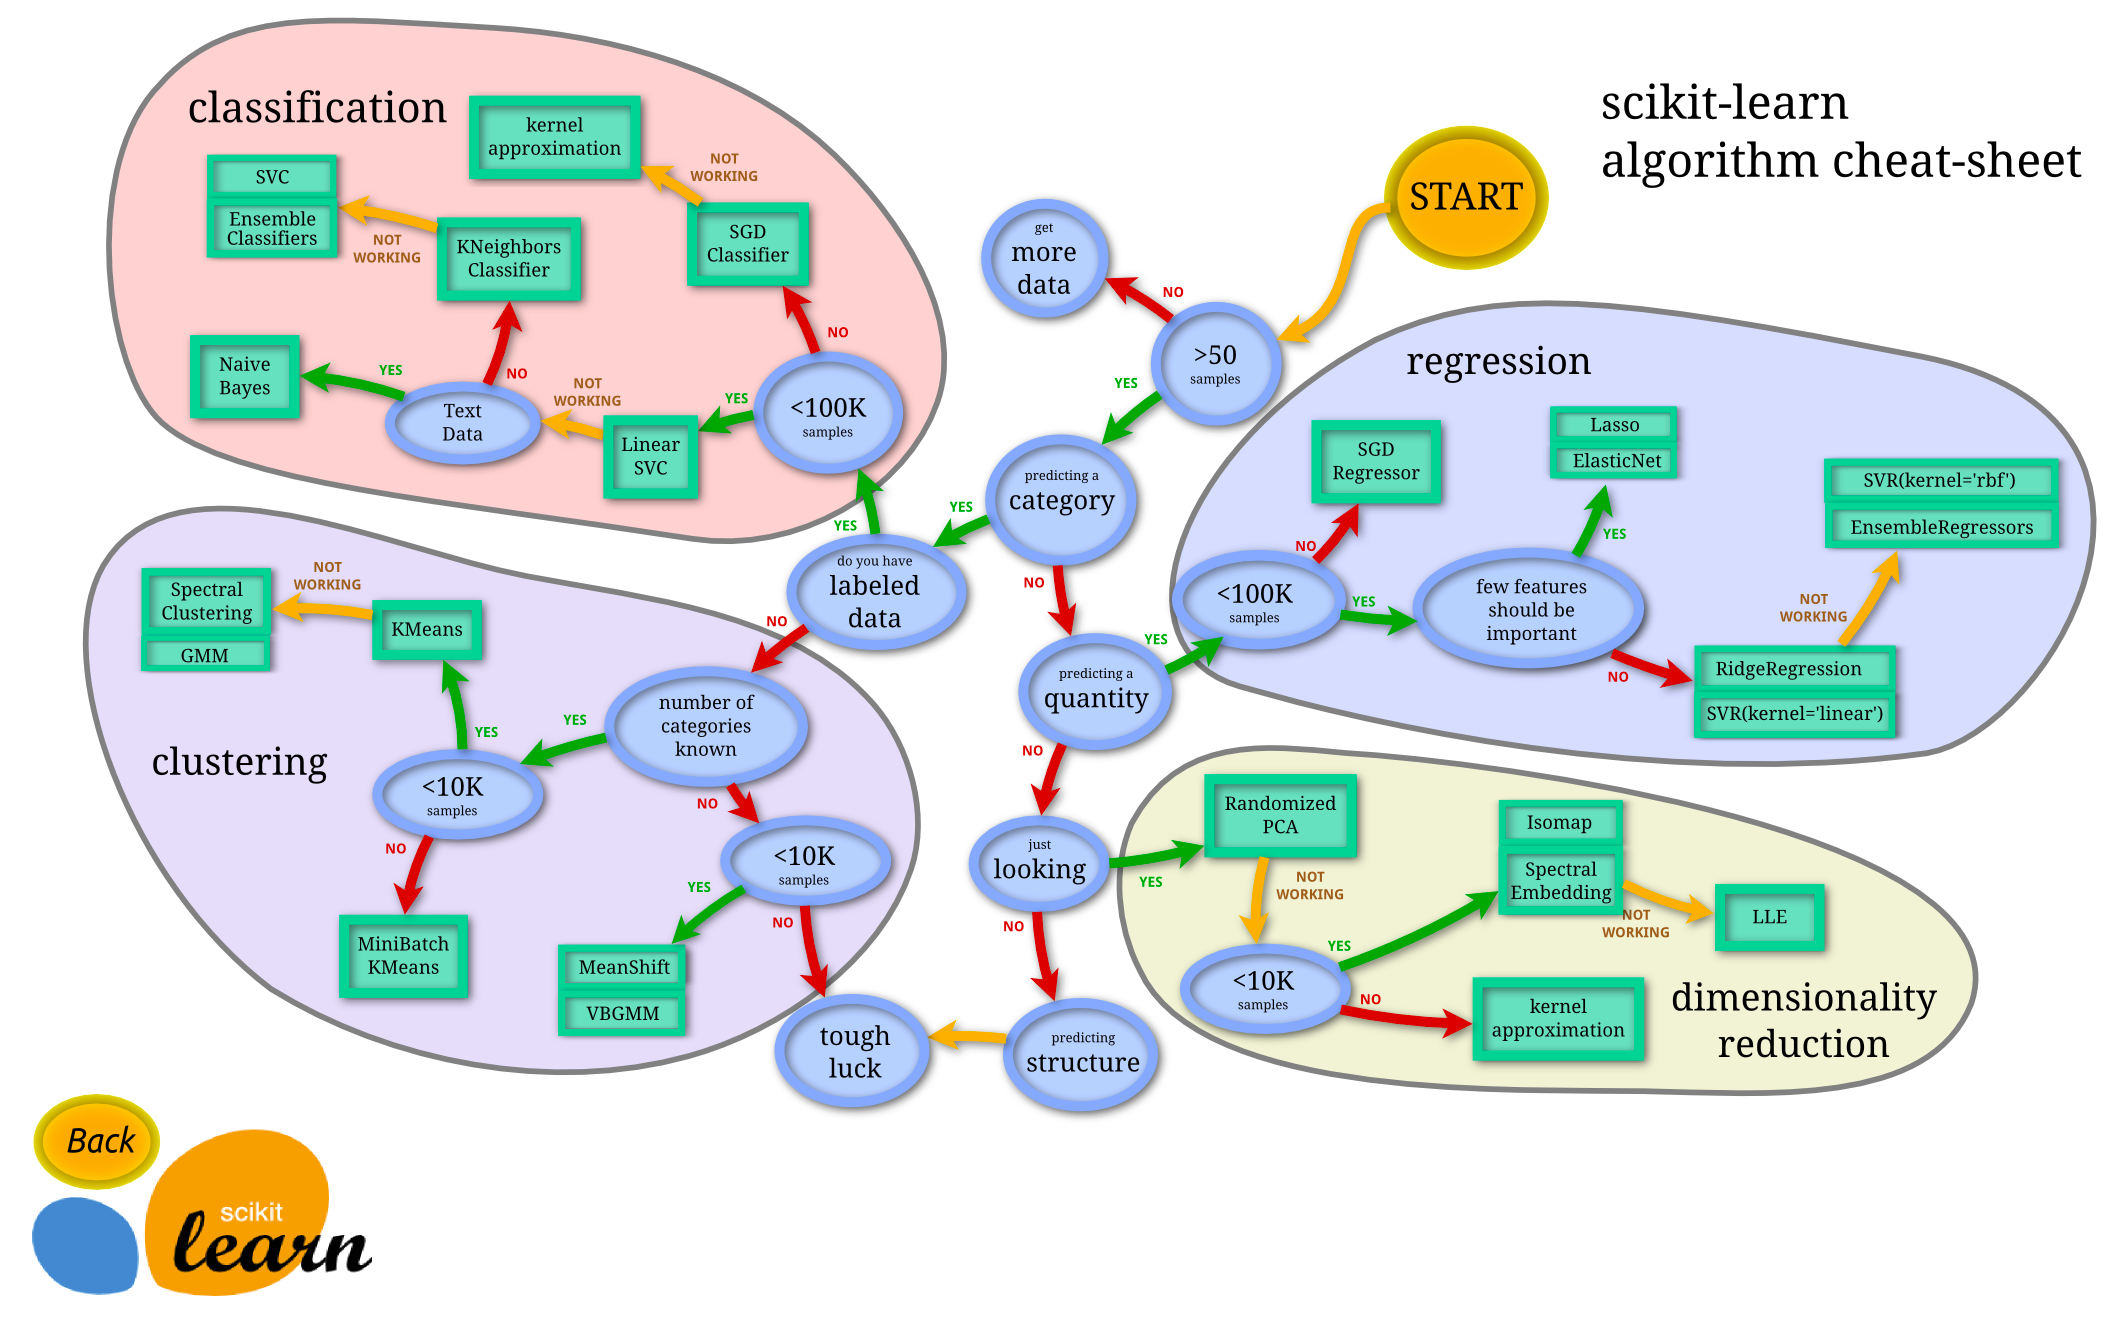

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
برای شروع، ما داده‌ها را تولید می‌کنیم:
</p>

In [682]:
N = 100
R = 2
x = np.zeros((R, N))
y = np.zeros((1, N))
# ----------------- #
x[:, 0:25] = np.random.randn(R, 25) +  np.array([[-3], [-3]]) #class #1
y[:, 0:25] = 0

x[:, 25:50] = np.random.randn(R, 25) +  np.array([[-3], [3]]) #class #2
y[:, 25:50] = 1

x[:, 50:75] = np.random.randn(R, 25) +  np.array([[3], [-3]]) #class #3
y[:, 50:75] = 2

x[:, 75:100] = np.random.randn(R, 25) +  np.array([[3], [3]]) #class #4
y[:, 75:100] = 3

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
حال داده‌ها را به بازه منفی ۱ و ۱ مقیاس می‌کنیم.
</p>

In [683]:
data = x.T / abs(x).max()

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
از داخل راهنمای ماژول، به دنبال شبکه پرسپترون تک لایه می‌گردیم و آن را برنامه اضافه می‌کنیم. می‌دانیم شبکه پرسپترون یک شبکه خطی است، یعنی داده‌های خطی جداپذیر را دسته بندی می‌کند، پس در زیر ماژول 
linear_model 
به دنبال آن می‌گردیم:
</p>

[راهنمای sklearn](https://scikit-learn.org/stable/modules/classes.html)

In [684]:
from sklearn.linear_model import perceptron

In [685]:
mlp = perceptron.Perceptron(max_iter=10, verbose=True)
mlp

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=10, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=True, warm_start=False)

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
حال باید داده‌ها را به دو مجموعه آموزش و آزمون تقسیم کنیم. این کار را می‌توانیم با استفاده از همان روش قبل انجام دهیم و یا به طور اصولی‌تر با استفاده از 
sklearn 
این کار را انجام دهیم. اگر در راهنما را نگاه بیندازیم به دستور 
train_test_split 
برمی‌خوریم که می‌توانیم داده‌ها را جدا نماییم.
</p>

In [686]:
from sklearn.model_selection import train_test_split

In [687]:
tr_X, te_X, tr_Y, te_Y = train_test_split(data, y[0], shuffle=True, test_size=0.25)

In [688]:
tr_X.shape

(75, 2)

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
حال شبکه‌ای را که تولید کرده‌ایم را روی داده‌های آموزشی آموزش می‌دهیم. برای جزییات بیشتر بهتر است راهنمای دستور ملاحظه شود.
</p>

In [689]:
mlp.fit(tr_X, tr_Y)

-- Epoch 1
Norm: 2.51, NNZs: 2, Bias: -1.000000, T: 75, Avg. loss: 0.025468
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.51, NNZs: 2, Bias: -1.000000, T: 150, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.51, NNZs: 2, Bias: -1.000000, T: 225, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.51, NNZs: 2, Bias: -1.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.51, NNZs: 2, Bias: -1.000000, T: 375, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.51, NNZs: 2, Bias: -1.000000, T: 450, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.51, NNZs: 2, Bias: -1.000000, T: 525, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.51, NNZs: 2, Bias: -1.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.51, NNZs: 2, Bias: -1.000000, T: 675, Avg. loss: 0.000000
Total training time: 0.00 se

/usr/lib/python3/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=10, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=True, warm_start=False)

In [690]:
t = mlp.predict(te_X)

In [691]:
confusion_matrix(t, te_Y)

array([[6, 0, 1, 0],
       [0, 4, 0, 0],
       [0, 0, 7, 0],
       [0, 0, 0, 7]])

In [692]:
b = mlp.intercept_
W = mlp.coef_

<p style="direction:rtl;text-align:justify;font-family:'B Zar';font-size:16pt">
دوباره بیایید داده‌ها و فضای دسته‌ها را رسم نماییم. اینبار، ماژول پرسپترون به ما احتمال این که داده به هر کلاس متعلق باشد را هم می‌دهد. پس می‌توانیم فضای مش را بر حسب احتمال هر کلاس دسته بندی نماییم.

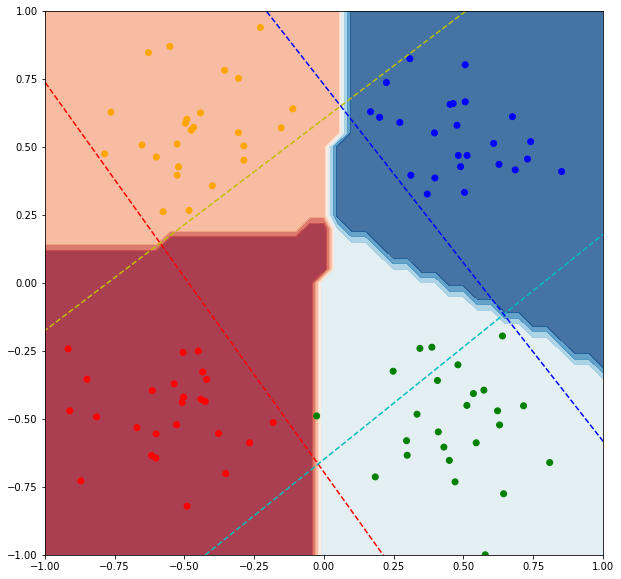

In [693]:
X, Y = np.meshgrid(np.arange(-1, 1.1, 0.05),np.arange(-1, 1.1, 0.05))
E = np.array([[X.ravel(),Y.ravel()]])[0].T


t = mlp.predict(E)
Z = t.reshape(X.shape)

plt.figure(figsize=(10,10))

color = np.array(['red']*25+['orange']*25+['green']*25+['blue']*25)

plt.contourf(X, Y, Z, cmap=cm.RdBu, alpha=.8);
plt.scatter(data[:,0], data[:, 1], c=color);

plot_hyperplane(W[0], b[0], -1, 1, 'r--', 2)
plot_hyperplane(W[1], b[1], -1, 1, 'y--', 2)
plot_hyperplane(W[2], b[2], -1, 1, 'c--', 2)
plot_hyperplane(W[3], b[3], -1, 1, 'b--', 2)
plt.axis([-1,1, -1, 1]);

In [694]:
confusion_matrix(mlp.predict(data), y[0])

array([[25,  0,  1,  0],
       [ 0, 25,  0,  0],
       [ 0,  0, 24,  0],
       [ 0,  0,  0, 25]])